In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [23]:
#with open("../ressources/automode_descriptions_evaluated.pickle", "rb") as file:
with open("../ressources/automode_evaluated_seed42_n40.pickle", "rb") as file:
#with open("testdata.pkl", "rb") as file:
    original_df = pickle.load(file)

In [24]:
original_df["type"] = original_df["parameters"].map(lambda x: type(x.objective_params).__name__)
original_df["original_index"] = original_df.index
original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)
original_df["coeff_of_var"] = original_df["scores"].map(lambda x: x+abs(np.min(x)) + 1 if x is not None else None).map(lambda x: np.std(x)/np.mean(x) if x is not None else None)


In [25]:
group_dfs = {category: group.reset_index(drop=True) for category, group in original_df.groupby("type")}

for group, df in group_dfs.items():
    old_size = len(df)
    cleaned = df.dropna()
    new_size = len(cleaned)
    print(f" {group}:  {old_size=} {new_size=}: ratio: {new_size/float(old_size)}")
    group_dfs[group] = cleaned

 Aggregation:  old_size=9 new_size=9: ratio: 1.0
 Connection:  old_size=10 new_size=10: ratio: 1.0
 Distribution:  old_size=12 new_size=11: ratio: 0.9166666666666666
 Foraging:  old_size=9 new_size=8: ratio: 0.8888888888888888


In [26]:
group_dfs["Aggregation"]

,description,configuration,parameters,argos,behavior_tree,scores,avg_score,type,original_index,z-scores,coeff_of_var
0,"A rectangular area, with a length of 2.43 mete...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.375, 0.3125, 0.1875, 0.1875, 0.3125, 0.375,...",0.312500,Aggregation,3,"[0.7071067811865475, 0.0, -1.414213562373095, ...",0.058926
1,A circle with 4 walls forms the structure of t...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.233333, 0.2, 0.3, 0.266667, 0.233333, 0.133...",0.223333,Aggregation,7,"[0.17896104719483977, -0.41758174227550726, 1....",0.041187
2,The arena has a radius of 4.12 m. There are th...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.333333, 0.291667, 0.375, 0.291667, 0.25, 0....",0.329167,Aggregation,12,"[0.08803739180024273, -0.7923999187028179, 0.9...",0.029968
3,"A rectangular area, with a length of 2.46 mete...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.22, 0.4, 0.34, 0.36, 0.34, 0.22, 0.4, 0.32,...",0.324000,Aggregation,16,"[-1.6001893827313245, 1.1693691643036617, 0.24...",0.042093
4,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.2, 0.35, 0.3, 0.3, 0.4, 0.35, 0.35, 0.45, 0...",0.340000,Aggregation,19,"[-2.110579412044345, 0.15075567228888195, -0.6...",0.043073
5,The area is a rectangle with dimensions 3.09 x...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.35, 0.3, 0.5, 0.45, 0.35, 0.45, 0.4, 0.35, ...",0.385000,Aggregation,23,"[-0.5895063447465636, -1.4316582658130823, 1.9...",0.035235
6,"With a radius of 3.64 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.227273, 0.363636, 0.454545, 0.318182, 0.318...",0.318182,Aggregation,27,"[-0.9534608348693867, 0.47672816249285027, 1.4...",0.067665
7,"The circular arena, constructed with 15 walls,...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.235294, 0.176471, 0.205882, 0.176471, 0.264...",0.226471,Aggregation,33,"[0.2364276295550382, -1.3397833633065903, -0.5...",0.026601
8,"The circular arena, having a radius of 4.95 me...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.142857, 0.0357143, 0.214286, 0.107143, 0.07...",0.125000,Aggregation,36,"[0.34921352616056583, -1.7460754532264924, 1.7...",0.044055


## Distribution of Scores

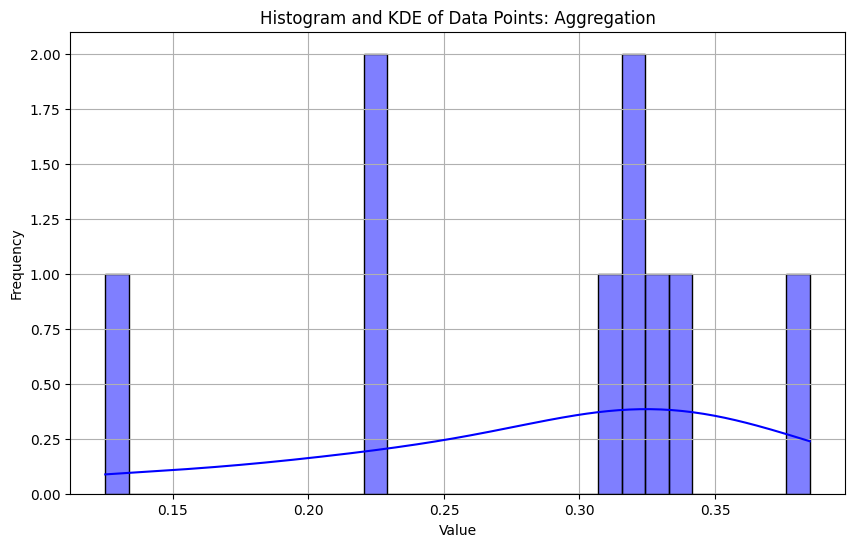

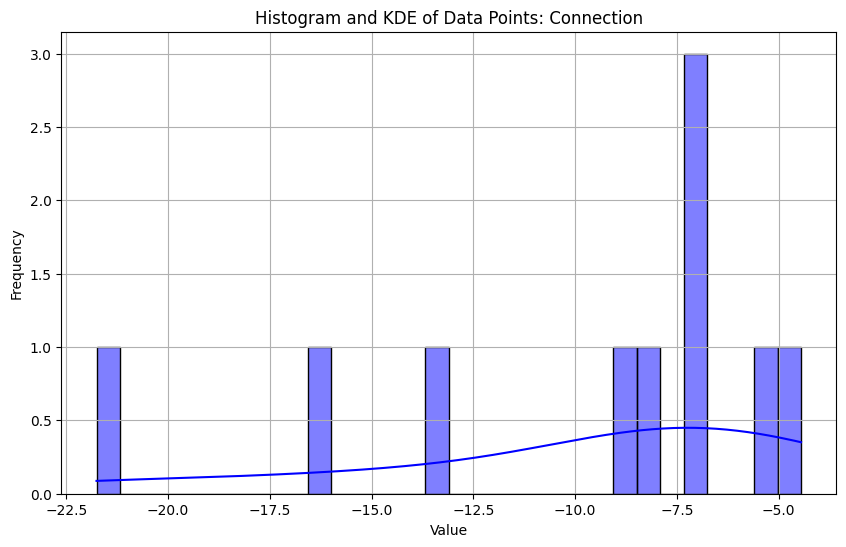

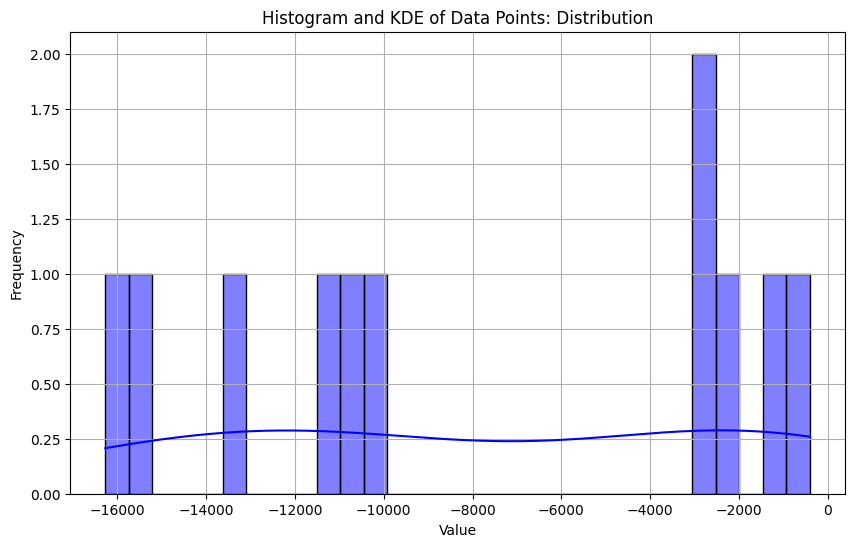

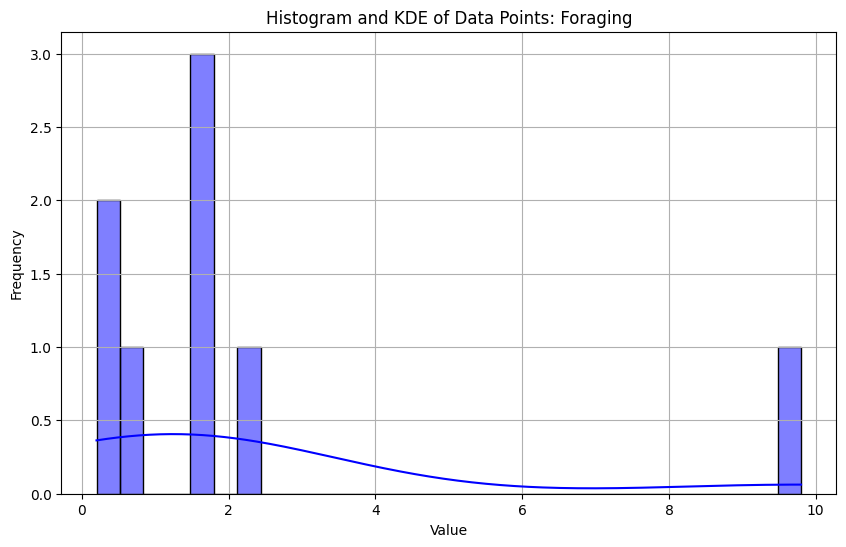

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for group, df in group_dfs.items():
    # Sample data
    data = df.avg_score.to_numpy()

    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.5)
    plt.title(f"Histogram and KDE of Data Points: {group}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


In [28]:
import plotly.express as px
import numpy as np

# Sample data
data = group_dfs["Aggregation"].avg_score.to_numpy()

# Create a KDE plot
# fig = px.density_contour(x=data, title='KDE Plot of Data Points', labels={'x': 'Value'})
# fig.update_layout(xaxis_title='Value', yaxis_title='Density')
# fig.show()

# Create a histogram
fig = px.histogram(data, nbins=30, title='Histogram of Data Points', labels={'value': 'Value'})
fig.update_layout(xaxis_title='Value', yaxis_title='Frequency')
fig.show()


## Coefficient of Variation Analysis

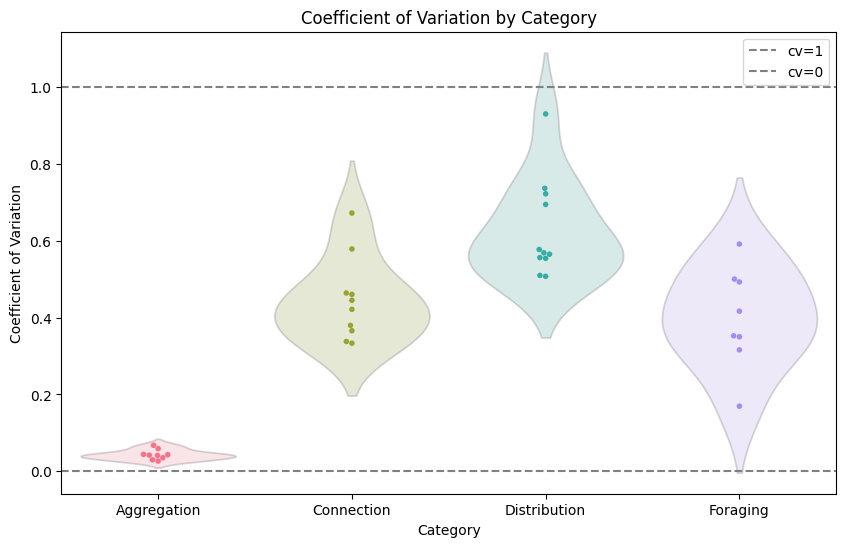

In [29]:
combined_df = pd.concat(
    [df.assign(category=category) for category, df in group_dfs.items()],
    ignore_index=True
)

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df, x='category', y='coeff_of_var', inner=None, palette=palette, alpha=0.21, hue='category')

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df, x='category', y='coeff_of_var', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='cv=1')
plt.axhline(y=0, color='grey', linestyle='--', label='cv=0')

# Step 4: Customize the plot
plt.title('Coefficient of Variation by Category')
plt.xlabel('Category')
plt.ylabel('Coefficient of Variation')
plt.legend()  # Show legend for the horizontal line
plt.show()

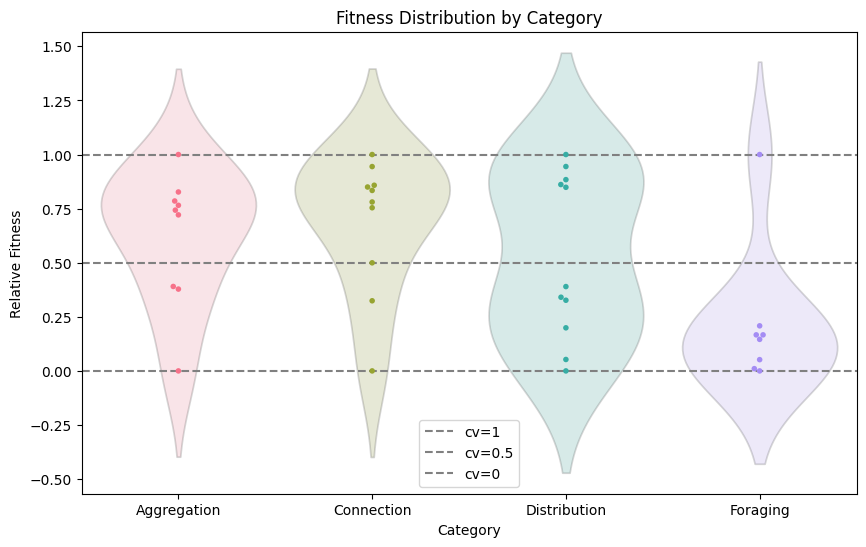

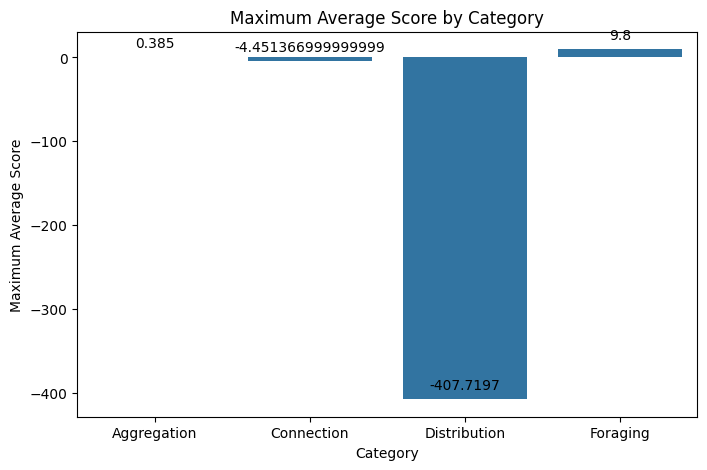

In [30]:
# Step 1: Calculate the max and min avg_score for each category
min_max_values = combined_df.groupby("category")["avg_score"].agg(['min', 'max']).reset_index()

# Step 2: Merge the min and max values back to the original DataFrame
combined_df_scaled = combined_df.merge(min_max_values, on="category")

# Step 3: Scale the avg_score to the range [0, 1]
combined_df_scaled['scaled_avg_score'] = (combined_df_scaled['avg_score'] - combined_df_scaled['min']) / (combined_df_scaled['max'] - combined_df_scaled['min'])

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df_scaled['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df_scaled, x='category', y='scaled_avg_score', inner=None, palette=palette, alpha=0.21, hue='category')

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df_scaled, x='category', y='scaled_avg_score', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='cv=1')
plt.axhline(y=0.5, color='grey', linestyle='--', label='cv=0.5')
plt.axhline(y=0, color='grey', linestyle='--', label='cv=0')

# Step 4: Customize the plot
plt.title('Fitness Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Relative Fitness')
plt.legend()  # Show legend for the horizontal line
plt.show()

# Step 1: Calculate the maximum avg_score for each category
max_values = combined_df_scaled.groupby("category")["avg_score"].max().reset_index()
max_values.rename(columns={"avg_score": "max_avg_score"}, inplace=True)

# Step 2: Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=max_values, x='category', y='max_avg_score', legend=False)

# Adding titles and labels
plt.title('Maximum Average Score by Category')
plt.xlabel('Category')
plt.ylabel('Maximum Average Score')

# Step 3: Annotate the bars with their respective values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Offset text
                      textcoords='offset points')